In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the data

In [3]:
data = 'data/penguins.csv'
df = pd.read_csv(data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Filling the missing values with the mean of the data

In [5]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(value = df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(value = df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Remove Categorial Data

In [7]:
X = df.drop(['island', 'sex'], axis = 1)

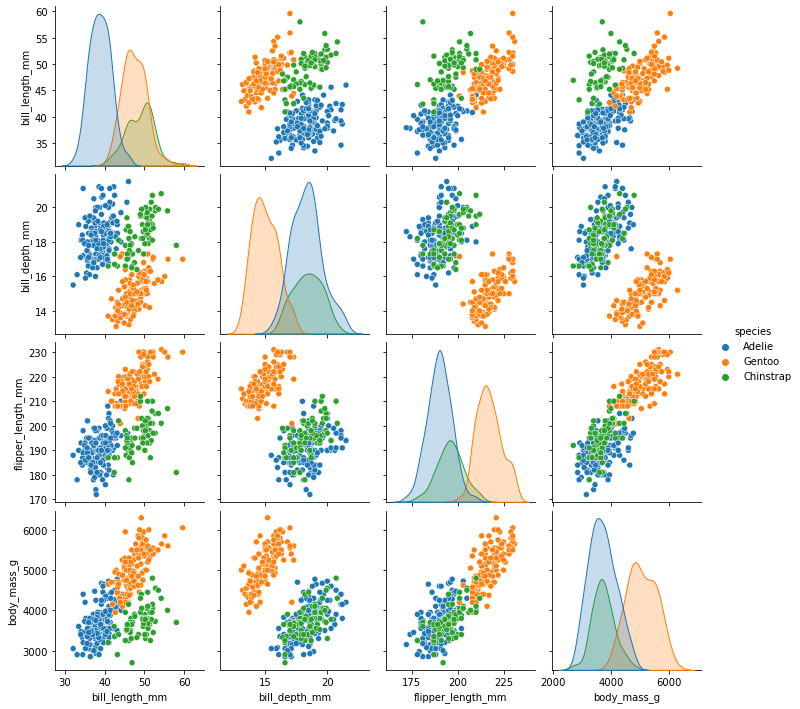

In [8]:
sns.pairplot(X, hue = 'species')
plt.show()

### Remove the target variable

In [9]:
X = X.drop(['species'], axis = 1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


### Run the Elbow method to find optimal K

C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


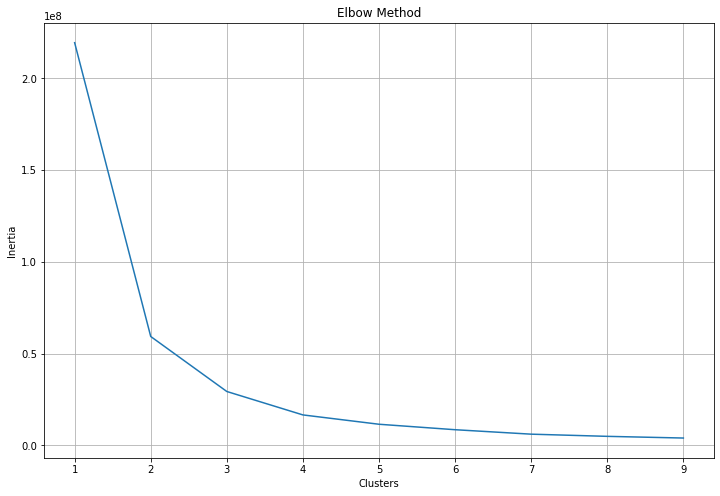

In [11]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i, max_iter = 600, tol = 1).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

### Run the Silhouette score to check the quality of the clusters

For n_clusters = 2 The average silhouette_score is : 0.6270788983213472
For n_clusters = 3 The average silhouette_score is : 0.5746583550492241
For n_clusters = 4 The average silhouette_score is : 0.5509162802297837
For n_clusters = 5 The average silhouette_score is : 0.5426581018917985


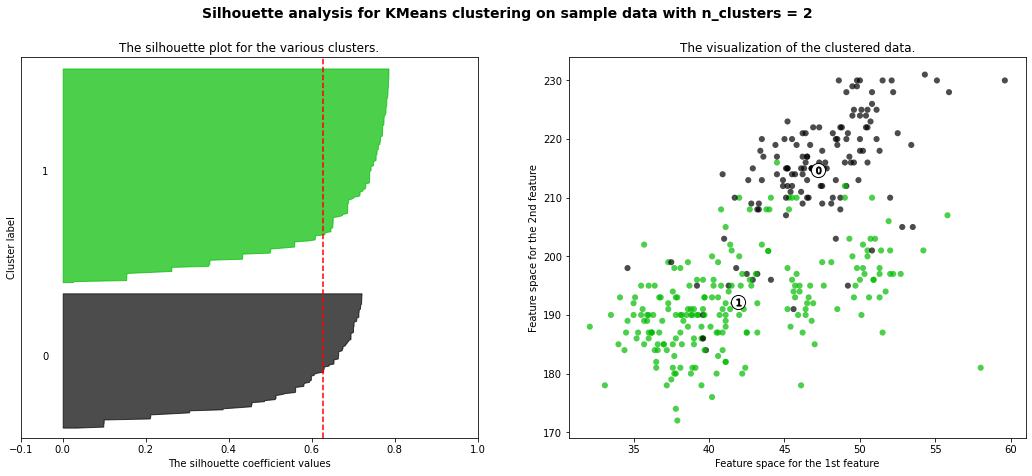

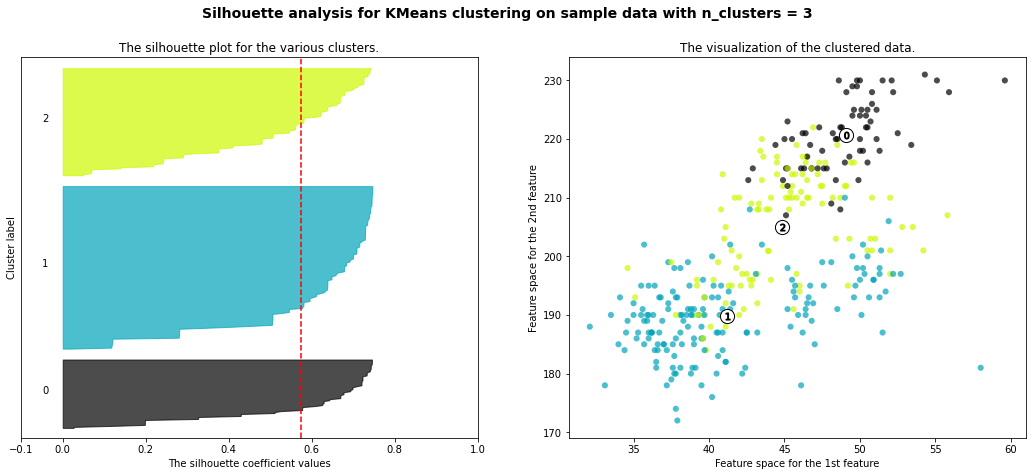

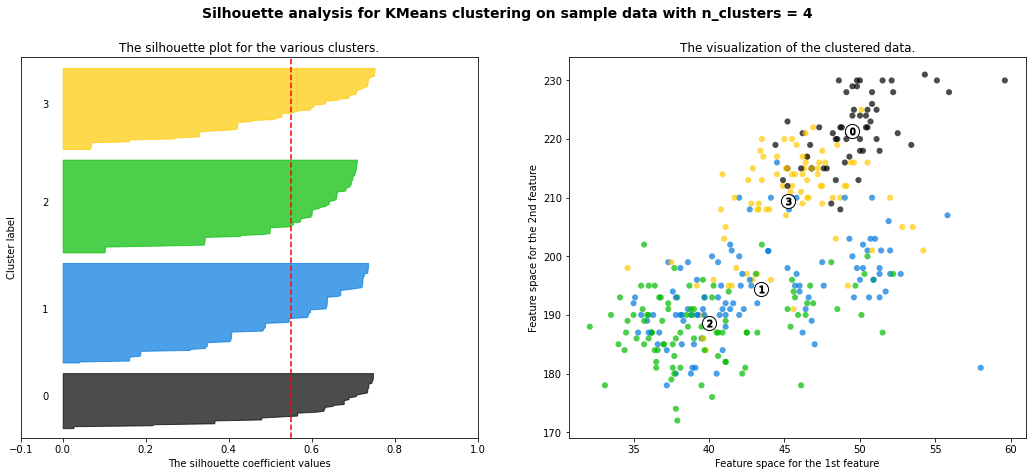

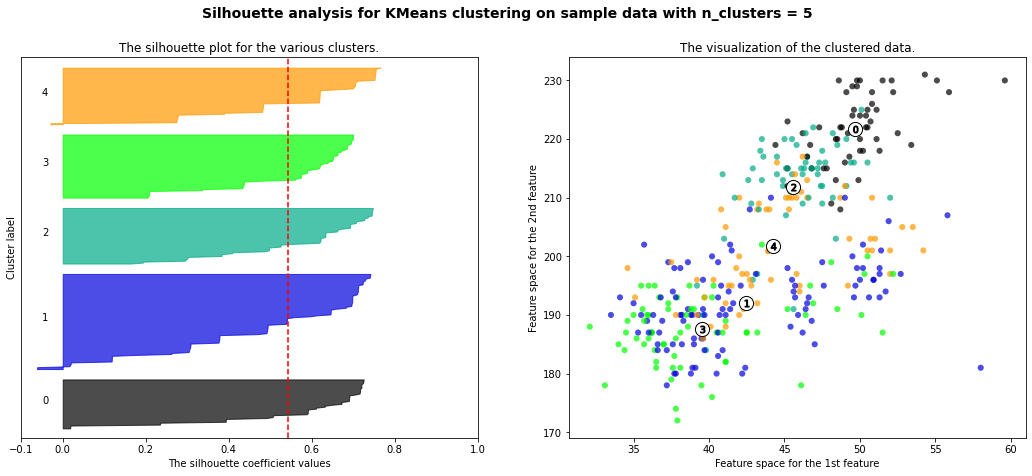

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter = 600, tol = 1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['bill_length_mm'], X['flipper_length_mm'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Number of clusters = 2

In [15]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

### Fit the model

In [16]:
model = km.fit(X)

### Get the new features from KMeans clustering

In [17]:
cluster_features = model.transform(X)
cluster_features

array([[1316.55998141,   87.20306974],
       [1266.44984855,  136.58931712],
       [1816.22062689,  413.58981957],
       [ 864.46254944,  538.25026663],
       [1616.28316351,  213.64572332],
       [1416.34555837,   14.2408063 ],
       [1441.51951545,   40.30673862],
       [ 391.69877663, 1011.43052967],
       [1591.30307432,  188.73995231],
       [ 816.5032124 ,  586.4305501 ],
       [1766.3583484 ,  363.65642965],
       [1366.57414543,   38.66272018],
       [1866.39713127,  463.69287695],
       [1266.36266938,  136.50421629],
       [ 666.45032671,  736.48667149],
       [1366.46550637,   37.51918606],
       [1616.24507839,  213.62100968],
       [ 566.41877947,  836.43983797],
       [1741.41944631,  338.7622103 ],
       [ 866.36770822,  536.45173997],
       [1666.62576313,  264.24321702],
       [1466.54453934,   64.89280109],
       [1266.41589635,  136.59787654],
       [1116.53426026,  286.53854073],
       [1266.60456008,  137.01173714],
       [1266.46287667,  1

### Add the new features to the dataset

In [18]:
X['cluster_feature_one'] = cluster_features[:, 0]
X['cluster_feature_two'] = cluster_features[:, 1]

In [19]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster_feature_one,cluster_feature_two
0,39.10000,18.70000,181.000000,3750.000000,1316.559981,87.203070
1,39.50000,17.40000,186.000000,3800.000000,1266.449849,136.589317
2,40.30000,18.00000,195.000000,3250.000000,1816.220627,413.589820
3,43.92193,17.15117,200.915205,4201.754386,864.462549,538.250267
4,36.70000,19.30000,193.000000,3450.000000,1616.283164,213.645723
...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,1066.169427,337.035538
340,43.50000,18.10000,202.000000,3400.000000,1666.153239,263.761713
341,49.60000,18.20000,193.000000,3775.000000,1291.286703,111.691117
342,50.80000,19.00000,210.000000,4100.000000,966.122615,436.873400


### Get the KMeans clustering labels

In [27]:
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [28]:
X['labels'] = cluster_labels
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster_feature_one,cluster_feature_two,labels
0,39.10000,18.70000,181.000000,3750.000000,1316.559981,87.203070,1
1,39.50000,17.40000,186.000000,3800.000000,1266.449849,136.589317,1
2,40.30000,18.00000,195.000000,3250.000000,1816.220627,413.589820,1
3,43.92193,17.15117,200.915205,4201.754386,864.462549,538.250267,1
4,36.70000,19.30000,193.000000,3450.000000,1616.283164,213.645723,1
...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,1066.169427,337.035538,1
340,43.50000,18.10000,202.000000,3400.000000,1666.153239,263.761713,1
341,49.60000,18.20000,193.000000,3775.000000,1291.286703,111.691117,1
342,50.80000,19.00000,210.000000,4100.000000,966.122615,436.873400,1


### Generate the new pairwise plot

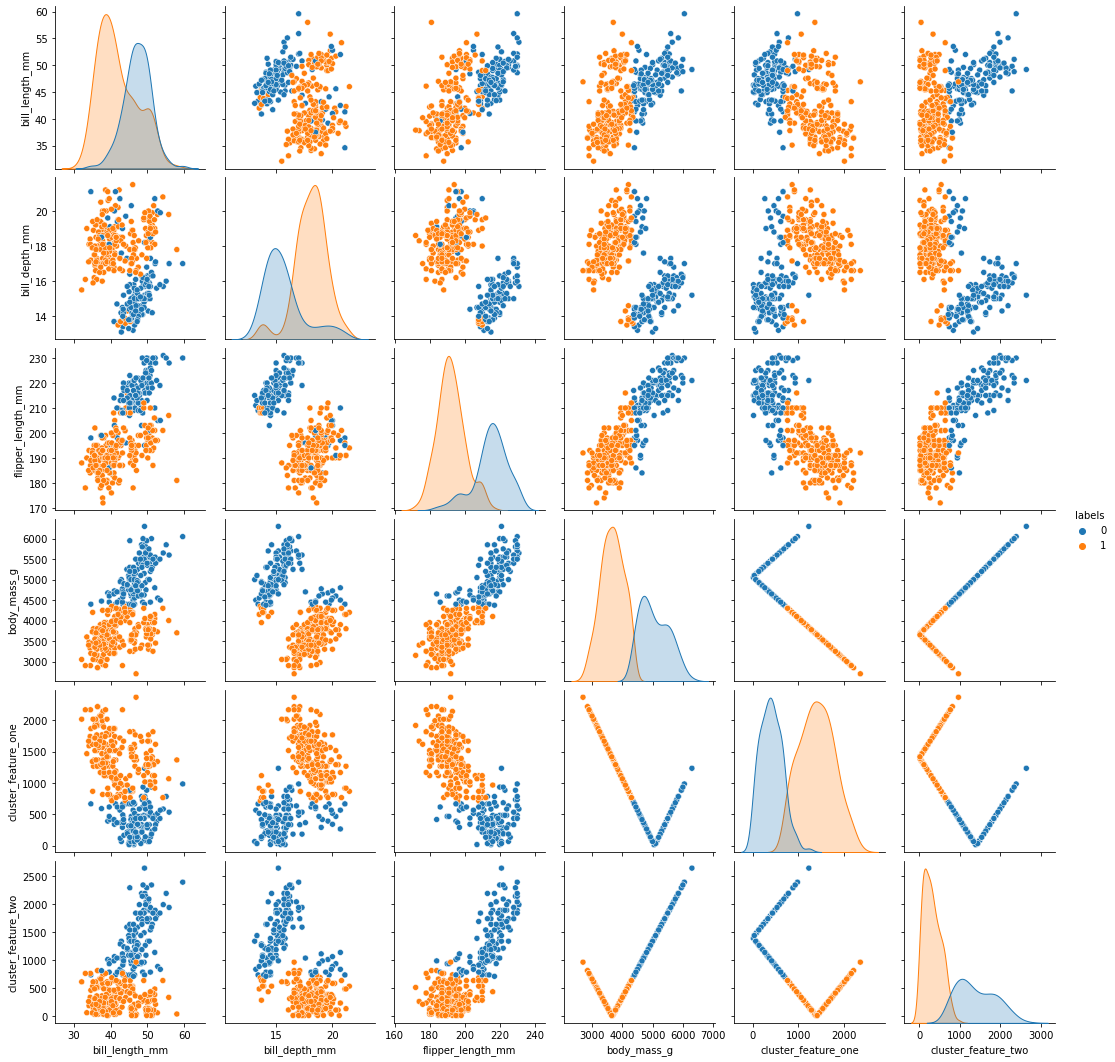

In [22]:
sns.pairplot(X, hue = 'labels')
plt.show()

In [1]:
X

NameError: name 'X' is not defined

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [33]:
y = X['labels']
X = X.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(344, 6)
(344,)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(240, 6)
(104, 6)


In [35]:
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
trained = model.predict(x_train)
predicted = model.predict(x_test)

# get the accuracy
print (accuracy_score(y_train, trained))
print (accuracy_score(y_test, predicted))

4/4 [==============================] - 0s 1ms/step
0.6125
0.6153846153846154
